# Customer Segmentation using K-Means Clustering

In [ ]:
import pandas as pd  ##read 
import matplotlib.pyplot as plt ###visualization
import numpy as np ##calc
import seaborn as sns #visualization
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler 

# EDA

In [2]:
#Exploratory Data Analysis (EDA)
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#EDA
#df.info()
df.describe()
#df.shape

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Gender

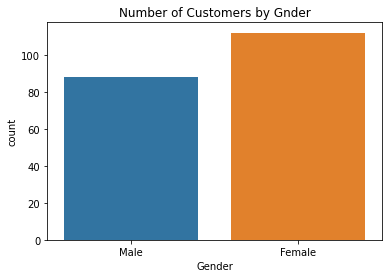

In [5]:
sns.countplot(data=df,x='Gender')
plt.title("Number of Customers by Gnder")
plt.show()

# Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

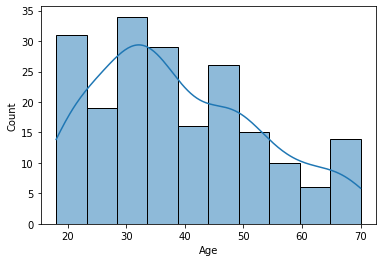

In [6]:
sns.histplot(df['Age'],bins=10,kde=True)

## Annual Income (k$)

In [8]:
df.columns 
df.rename({'Annual Income (k$)':"Income",'Spending Score (1-100)':"Score"},axis=1,inplace=True) 
df

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


<AxesSubplot:xlabel='Age', ylabel='Income'>

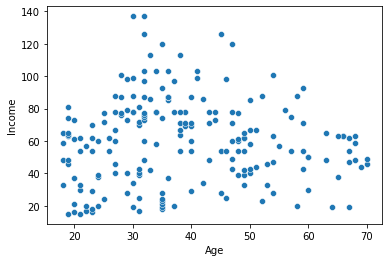

In [9]:
sns.scatterplot(x=df['Age'],y=df['Income'])

<AxesSubplot:xlabel='Income', ylabel='Score'>

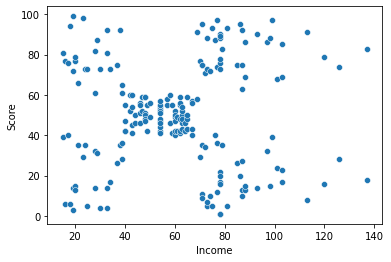

In [10]:
sns.scatterplot(x=df['Income'],y=df['Score'])

In [11]:
x=df[['Income','Score']].values

In [12]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Clustering using K-means

In [13]:
#scalling
scaler=StandardScaler() 
x_scaled=scaler.fit_transform(x)

In [14]:
x_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [15]:
#Modeling

from sklearn.cluster import KMeans 
km5=KMeans (n_clusters=5,init='k-means++',random_state=0)
km5

KMeans(n_clusters=5, random_state=0)

In [16]:
km5.fit(x_scaled)

C:\Users\Hp\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [17]:
y_pred=km5.predict(x_scaled)
y_pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [18]:
km5.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [19]:
x_df=pd.DataFrame(x)

In [20]:
x_df['cluster']=y_pred

In [21]:
x_df

,0,1,cluster
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


In [22]:
#filtering

x[y_pred==0]

array([[39, 61],
       [40, 55],
       [40, 47],
       [40, 42],
       [40, 42],
       [42, 52],
       [42, 60],
       [43, 54],
       [43, 60],
       [43, 45],
       [43, 41],
       [44, 50],
       [44, 46],
       [46, 51],
       [46, 46],
       [46, 56],
       [46, 55],
       [47, 52],
       [47, 59],
       [48, 51],
       [48, 59],
       [48, 50],
       [48, 48],
       [48, 59],
       [48, 47],
       [49, 55],
       [49, 42],
       [50, 49],
       [50, 56],
       [54, 47],
       [54, 54],
       [54, 53],
       [54, 48],
       [54, 52],
       [54, 42],
       [54, 51],
       [54, 55],
       [54, 41],
       [54, 44],
       [54, 57],
       [54, 46],
       [57, 58],
       [57, 55],
       [58, 60],
       [58, 46],
       [59, 55],
       [59, 41],
       [60, 49],
       [60, 40],
       [60, 42],
       [60, 52],
       [60, 47],
       [60, 50],
       [61, 42],
       [61, 49],
       [62, 41],
       [62, 48],
       [62, 59],
       [62, 55

In [23]:
#the number of data point in cluster0
x[y_pred==0].shape

(81, 2)

In [24]:
##the number of data point in cluster1
x[y_pred==1].shape

(39, 2)

In [25]:
##the number of data point in cluster2
x[y_pred==2].shape

(35, 2)

[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]
 [-1.32954532  1.13217788]]


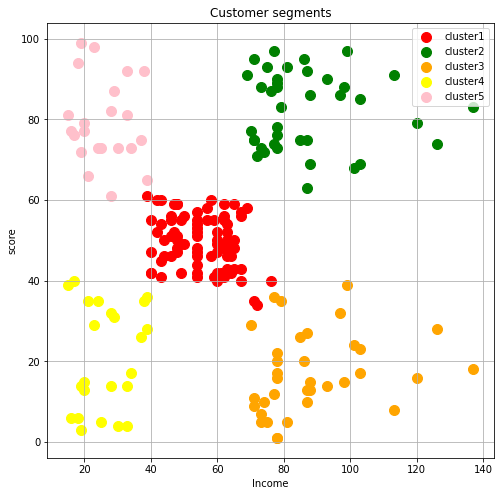

In [26]:
#show clusters
plt.figure(figsize=(8,8))
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=100,c='green',label='cluster2')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],s=100,c='orange',label='cluster3')
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],s=100,c='yellow',label='cluster4')
plt.scatter(x[y_pred==4,0],x[y_pred==4,1],s=100,c='pink',label='cluster5')

##show centroid of clusters
##plt.scatter(km5.cluster_centers_[:,0],km5.cluster_centers_[:,1],s=50,c='black',label='centroids',marker='X')




plt.title('Customer segments')
plt.xlabel('Income')
plt.ylabel('score')
plt.legend()
plt.grid()
print(km5.cluster_centers_)

## Elbow Method

In [27]:
km5.inertia_

65.56840815571681

C:\Users\Hp\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1419: 

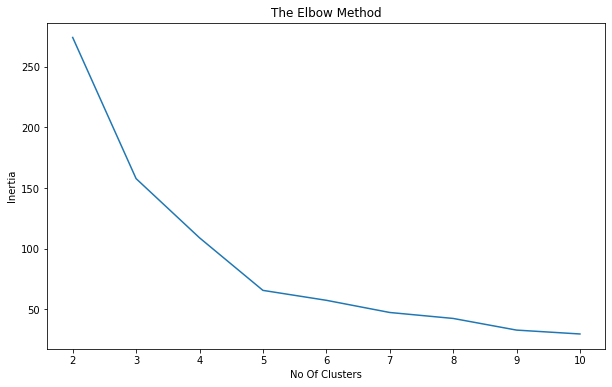

In [28]:
#fit to each number of cluster and calculate the inertia ,make representation 
#dedict range of cluster(k) and note that always the range =dim number+1 

k_range=range(2,11)
inertia=[]
for i in k_range:
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)
fig,ax=plt.subplots(figsize=(10,6))
sns.lineplot(x=k_range,y=inertia)
plt.title("The Elbow Method")
plt.xlabel("No Of Clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:
#########################################################################33

In [ ]:
# Clustering using K-means without 


In [29]:
km5.fit(x)

C:\Users\Hp\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [30]:
y_pred1=km5.predict(x)

In [31]:
y_pred1

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [32]:
xx_df=pd.DataFrame(x)
xx_df['cluster11111']=y_pred1

In [33]:
xx_df

,0,1,cluster11111
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


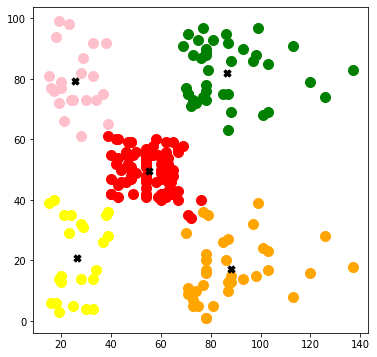

In [34]:
plt.figure(figsize=(6,6))
plt.scatter(x[y_pred1==0,0],x[y_pred1==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_pred1==1,0],x[y_pred1==1,1],s=100,c='green',label='cluster2')
plt.scatter(x[y_pred1==2,0],x[y_pred1==2,1],s=100,c='orange',label='cluster3')
plt.scatter(x[y_pred1==3,0],x[y_pred1==3,1],s=100,c='yellow',label='cluster4')
plt.scatter(x[y_pred1==4,0],x[y_pred1==4,1],s=100,c='pink',label='cluster5')

##show centroid of clusters
plt.scatter(km5.cluster_centers_[:,0],km5.cluster_centers_[:,1],s=50,c='black',label='centroids',marker='X')

print(km5.cluster_centers_)